<a href="https://colab.research.google.com/github/pratyushprasad2323/tensors/blob/main/A5_tensors_graphs_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION TO GRAPHS AND TF.FUNCTION

tf.function allows us to switch from eager execution to graph execution.

in the previous sections (A1,A2,A3), we ran tf.eagerly, meaning the codes were executed by TF python operation by operation and returning results back to python.

graph execution means that tensor computations are executed as a TF graph. graphs are data structures that contain a set of operation objects, which represent unit of coomputation.

This is what a TensorFlow graph representing a two-layer neural network looks like when visualized in TensorBoard: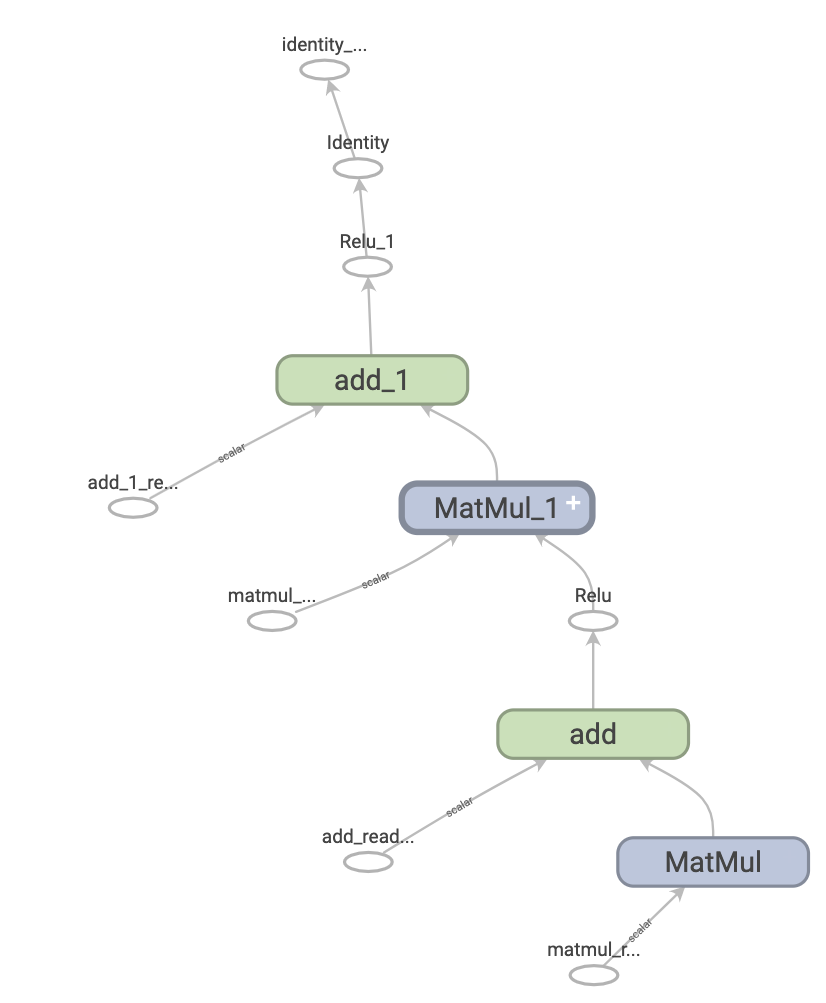

In [1]:
import tensorflow as tf
import timeit
from datetime import datetime
import numpy as np

In [2]:
def linear_regression(a,b,c):
  a=tf.matmul(a,b)
  a=a+c
  return a
graph_function=tf.function(linear_regression)
x=tf.Variable([[1.,2,3]])
y=tf.Variable([[1.],[2],[3]])
z=tf.Variable(10.)
print(linear_regression(x,y,z).numpy())
print(graph_function(x,y,z).numpy())
print(graph_function(x,y,z).numpy()==linear_regression(x,y,z).numpy())

[[24.]]
[[24.]]
[[ True]]


## CONVERTING FUNCTION TO GRAPH

In [3]:
def my_func(x):
  if tf.greater(x,0):
    return x
  else: 
    return 0
my_graph=tf.function(my_func)
print(my_graph(tf.Variable(3)).numpy())
print(my_graph(tf.Variable(-3)).numpy())

3
0


In [4]:
print(tf.autograph.to_code(my_func))

def tf__my_func(x):
    with ag__.FunctionScope('my_func', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (do_return, retval_)

        def set_state(vars_):
            nonlocal do_return, retval_
            (do_return, retval_) = vars_

        def if_body():
            nonlocal do_return, retval_
            try:
                do_return = True
                retval_ = ag__.ld(x)
            except:
                do_return = False
                raise

        def else_body():
            nonlocal do_return, retval_
            try:
                do_return = True
                retval_ = 0
            except:
                do_return = False
                raise
        ag__.if_stmt(ag__.converted_call(ag__.ld(tf).greater, (ag__.ld(x), 0), None, fscope), if_body, else

In [5]:
print(my_graph.get_concrete_function(tf.constant(1)).graph.as_graph_def())

node {
  name: "x"
  op: "Placeholder"
  attr {
    key: "_user_specified_name"
    value {
      s: "x"
    }
  }
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "shape"
    value {
      shape {
      }
    }
  }
}
node {
  name: "Greater/y"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 0
      }
    }
  }
}
node {
  name: "Greater"
  op: "Greater"
  input: "x"
  input: "Greater/y"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "cond"
  op: "StatelessIf"
  input: "Greater"
  input: "x"
  attr {
    key: "Tcond"
    value {
      type: DT_BOOL
    }
  }
  attr {
    key: "Tin"
    value {
      list {
        type: DT_INT32
      }
    }
  }
  attr {
    key: "Tout"
    value {
      list {
        type: DT_BOOL
        type: DT_INT32
      }
    }
  

In [6]:
@tf.function
def mse(ya,yp):
  dif=tf.pow(ya-yp,2)
  return tf.reduce_mean(dif)

a=tf.Variable(np.random.randint(0,10,10),dtype='float32')
b=tf.Variable(np.random.randint(0,10,10),dtype='float32')
print(a)
print(b)
print('MSE :',mse(a,b).numpy())

<tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=array([6., 6., 1., 7., 5., 6., 6., 4., 2., 2.], dtype=float32)>
<tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=array([9., 4., 1., 6., 9., 6., 3., 6., 5., 5.], dtype=float32)>
MSE : 6.1


In [7]:
# check execution time
tf.config.run_functions_eagerly(True)
print(mse(a,b))

tf.config.run_functions_eagerly(False)
def mse_a(ya,yp):
  dif=tf.pow(ya-yp,2)
  return tf.reduce_mean(dif)
print(mse_a(a,b))

tf.config.run_functions_eagerly(True)
print(mse_a(a,b))
tf.config.run_functions_eagerly(False)

tf.Tensor(6.1, shape=(), dtype=float32)
tf.Tensor(6.1, shape=(), dtype=float32)
tf.Tensor(6.1, shape=(), dtype=float32)


In [8]:
def unused_return_eager(x):
  # Get index 1 will fail when `len(x) == 1`
  tf.gather(x, [1])
  return x

try:
  print(unused_return_eager(tf.constant([100])))
except tf.errors.InvalidArgumentError as e:
  # All operations are run during eager execution so an error is raised.
  print(f'{type(e).__name__}: {e}')

InvalidArgumentError: indices[0] = 1 is not in [0, 1) [Op:GatherV2]


In [9]:
x=tf.random.uniform(shape=[10,10],minval=-3,maxval=5,dtype='int32')
def pow(x,y):
  res=tf.eye(10,dtype='int32')
  for i in range(y):
      res=tf.matmul(x,res)
  return res
print('function:', timeit.timeit(lambda:pow(x,100),number=1000))

function: 4.911738456999956


In [10]:
pow_graph=tf.function(pow)
print('graph:',timeit.timeit(lambda:pow_graph(x,100),number=1000))

graph: 1.5261379200001102
